In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn import datasets

Text(0, 0.5, 'Test Set Deviance')

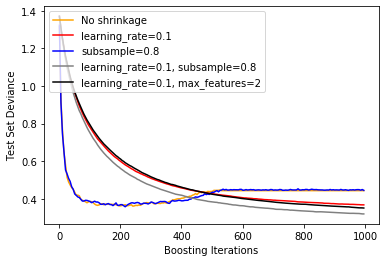

In [2]:
X, y = datasets.make_hastie_10_2(n_samples=12000, random_state=1)  # 10特征的二分类数据集
X = X.astype(np.float32)
labels = np.unique(y)
y = np.where(y == -1, 0, y)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

# 梯度提升树基学习器为决策树
original_params = {'n_estimators': 1000, 'max_leaf_nodes': 4, 'max_depth': None, 'random_state': 2,
                   'min_samples_split': 5}

for label, color, setting in [('No shrinkage', 'orange',
                               {'learning_rate': 1.0,
                                # learning rate shrinks the contribution of each tree by learning_rate
                                'subsample': 1.0}),
                              # The fraction of samples to be used for fitting the individual base learners.默认subsample=1.0
                              ('learning_rate=0.1', 'red',
                               {'learning_rate': 0.1,
                                'subsample': 1.0}),
                              ('subsample=0.8', 'blue',
                               {'learning_rate': 1.0,
                                'subsample': 0.8}),
                              ('learning_rate=0.1, subsample=0.8', 'gray',
                               {'learning_rate': 0.1,
                                'subsample': 0.8}),  # 此超参数可以减少方差增加偏差(抑制过拟合)
                              ('learning_rate=0.1, max_features=2', 'black',
                               {'learning_rate': 0.1,
                                'max_features': 2})]:  # 每次划分时使用的特征数量(特征采样),此超参数可以减少方差增加偏差(抑制过拟合)
    params = dict(original_params)
    params.update(setting)

    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    test_deviance = np.zeros((params['n_estimators'],), dtype=np.float64)
    for i, y_pred in enumerate(
            clf.staged_decision_function(X_test)):  # 不同数量(1到n_estimators)的树组合时,X_test到分类超平面的有符号距离(类似函数有:staged_predict)
        test_deviance[i] = clf.loss_(y_test, y_pred)

    plt.plot((np.arange(test_deviance.shape[0]) + 1)[::5], test_deviance[::5],
             '-', color=color, label=label)

plt.legend(loc='upper left')
plt.xlabel('Boosting Iterations')
plt.ylabel('Test Set Deviance')

In [3]:
clf.feature_importances_  # 特征的相对重要性(值越大,重要程度越高)

array([0.10682407, 0.11691706, 0.11548715, 0.08055835, 0.08621301,
       0.10676859, 0.10684466, 0.09117433, 0.08623918, 0.1029736 ])